# **Import the Libraries**

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumSquare Neo')
print(plt.rcParams['font.family'])

['NanumSquare Neo']


# **Import the data-set**

### load df_movie

In [13]:
df_movies = pd.read_csv('[DS]TermProject_data.csv', encoding='cp949')
df_movies.head()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,서울의 봄,김성수,(주)하이브미디어코프,NaN,플러스엠 엔터테인먼트,2023-11-22,개봉영화,장편,한국,2328,1.279270e+11,13128022,29336996104,2956527,드라마,12세이상관람가,일반영화
1,파묘,장재현,(주)쇼박스,NaN,(주)쇼박스,2024-02-22,개봉영화,장편,한국,2355,1.146310e+11,11860088,26825097498,2707856,미스터리,15세이상관람가,일반영화
2,범죄도시4,허명행,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트",NaN,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",2024-04-24,개봉영화,장편,한국,2980,4.757016e+10,5005512,9997331476,1015411,액션,15세이상관람가,일반영화
3,노량: 죽음의 바다,김한민,(주)빅스톤픽쳐스,NaN,"롯데컬처웍스(주)롯데엔터테인먼트,(주)에이스메이커무비웍스",2023-12-20,개봉영화,장편,한국,2196,4.500269e+10,4572561,9860710267,970404,사극,12세이상관람가,일반영화
4,시민덕희,박영주,"(주)씨제스엔터테인먼트,페이지원필름(주)",NaN,(주)쇼박스,2024-01-24,개봉영화,장편,한국,1272,1.611482e+10,1706676,3304172645,343519,드라마,15세이상관람가,일반영화


In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      3299 non-null   object 
 1   감독       3050 non-null   object 
 2   제작사      3173 non-null   object 
 3   수입사      2 non-null      object 
 4   배급사      3298 non-null   object 
 5   개봉일      3299 non-null   object 
 6   영화유형     3299 non-null   object 
 7   영화형태     3299 non-null   object 
 8   국적       3299 non-null   object 
 9   전국 스크린수  3299 non-null   int64  
 10  전국 매출액   3299 non-null   float64
 11  전국 관객수   3299 non-null   int64  
 12  서울 매출액   3299 non-null   int64  
 13  서울 관객수   3299 non-null   int64  
 14  장르       3256 non-null   object 
 15  등급       3299 non-null   object 
 16  영화구분     3299 non-null   object 
dtypes: float64(1), int64(4), object(12)
memory usage: 438.3+ KB


### load find_actor

In [15]:
df_actors = pd.read_csv('df_actor.csv')
df_actors.head()

,Unnamed: 0,영화명,감독,배우
0,1,서울의 봄,김성수,황정민
1,2,서울의 봄,김성수,정우성
2,3,서울의 봄,김성수,이성민
3,4,파묘,장재현,최민식
4,5,파묘,장재현,김고은


In [16]:
df_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1790 non-null   int64 
 1   영화명         1790 non-null   object
 2   감독          1790 non-null   object
 3   배우          1788 non-null   object
dtypes: int64(1), object(3)
memory usage: 56.1+ KB


### Add the performance data

In [17]:
#Creating a success label (Y/N) based on the average number of nationwide viewers
mean_revenue = df_movies['전국 관객수'].mean()
df_movies['흥행'] = np.where(df_movies['전국 관객수'] > mean_revenue, 'Y', 'N')
df_movies.info()
df_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      3299 non-null   object 
 1   감독       3050 non-null   object 
 2   제작사      3173 non-null   object 
 3   수입사      2 non-null      object 
 4   배급사      3298 non-null   object 
 5   개봉일      3299 non-null   object 
 6   영화유형     3299 non-null   object 
 7   영화형태     3299 non-null   object 
 8   국적       3299 non-null   object 
 9   전국 스크린수  3299 non-null   int64  
 10  전국 매출액   3299 non-null   float64
 11  전국 관객수   3299 non-null   int64  
 12  서울 매출액   3299 non-null   int64  
 13  서울 관객수   3299 non-null   int64  
 14  장르       3256 non-null   object 
 15  등급       3299 non-null   object 
 16  영화구분     3299 non-null   object 
 17  흥행       3299 non-null   object 
dtypes: float64(1), int64(4), object(13)
memory usage: 464.0+ KB


영화명           0
감독          249
제작사         126
수입사        3297
배급사           1
개봉일           0
영화유형          0
영화형태          0
국적            0
전국 스크린수       0
전국 매출액        0
전국 관객수        0
서울 매출액        0
서울 관객수        0
장르           43
등급            0
영화구분          0
흥행            0
dtype: int64

### merge movie data and actor data and convert to useful data

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Creating a list of actors for each movie
actor_grouped = df_actors.groupby('영화명')['배우'].apply(list).reset_index()

# Merging movie data with actor data
df_movies = pd.merge(df_movies, actor_grouped, on='영화명', how='left')

# Removing movie data without actor data
df_movies = df_movies.dropna(subset=['배우'])

# Converting the values in the 'Actor' column to empty lists if they are not lists
df_movies['배우'] = df_movies['배우'].apply(lambda x: x if all(isinstance(i, str) for i in x) else [])

# Removing rows with empty values in the 'Actor' column
df_movies.dropna(subset='배우', inplace=True)

# Converting actor lists into a dataframe
actors = df_actors[['영화명', '배우']]

# Merging success rate data with actor data
df_actors = actors.merge(df_movies[['영화명', '전국 관객수']], on='영화명', how='left')

# Normalizing total audience
scaler = MinMaxScaler()
df_actors['정규화된_관객수'] = scaler.fit_transform(df_actors[['전국 관객수']])

# Calculating normalized audience for each actor
actor_audience_normalized = df_actors.groupby('배우')['정규화된_관객수'].mean().reset_index()

# Applying normalized audience for each actor to movie data
actor_success_dict = dict(zip(actor_audience_normalized['배우'], actor_audience_normalized['정규화된_관객수']))

# Calculating the average normalized audience for lead actors in each movie
def get_movie_average_actor_normalized_audience(data, actor_success_dict):
    average_success_rate = []
    for actor_list in data['배우']:
        success_rates = [actor_success_dict.get(actor, 0) for actor in actor_list]
        average_success_rate.append(np.mean(success_rates))
    return average_success_rate

df_movies['주연배우_흥행비율'] = get_movie_average_actor_normalized_audience(df_movies, actor_success_dict)

# Dropping original actor data
df_movies.drop(columns=['배우'], axis=1, inplace=True)

# Checking the data
print(df_movies['주연배우_흥행비율'])


0       0.249570
1       0.319688
2       0.310839
3       0.301492
4       0.032677
          ...   
2964    0.000319
2965    0.000014
2978    0.000059
2996    0.010671
2997    0.000007
Name: 주연배우_흥행비율, Length: 851, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## **Preprocessing**

In [19]:
df_movies['영화유형'].value_counts()

영화유형
개봉영화    851
Name: count, dtype: int64

In [20]:
df_movies['국적'].value_counts()

국적
한국    851
Name: count, dtype: int64

### Drop unuseful column

In [21]:
# drop the column that useless or one categonical data
df_movies.drop(columns=[ '수입사', '개봉일', '영화유형','전국 매출액','전국 스크린수'
                        , '국적','서울 매출액','서울 관객수','영화형태'], axis=1, inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 2997
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   영화명        851 non-null    object 
 1   감독         851 non-null    object 
 2   제작사        836 non-null    object 
 3   배급사        851 non-null    object 
 4   전국 관객수     851 non-null    int64  
 5   장르         851 non-null    object 
 6   등급         851 non-null    object 
 7   영화구분       851 non-null    object 
 8   흥행         851 non-null    object 
 9   주연배우_흥행비율  850 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 73.1+ KB


### Encoding

      감독  director_rank
418  장재현              1
316  이상용              2
76   김성수              3
517  허명행              4
322  이석훈              5
..   ...            ...
326  이세원            539
381  이현준            540
504   하나            541
285  유희정            542
36   권유주            543

[543 rows x 2 columns]

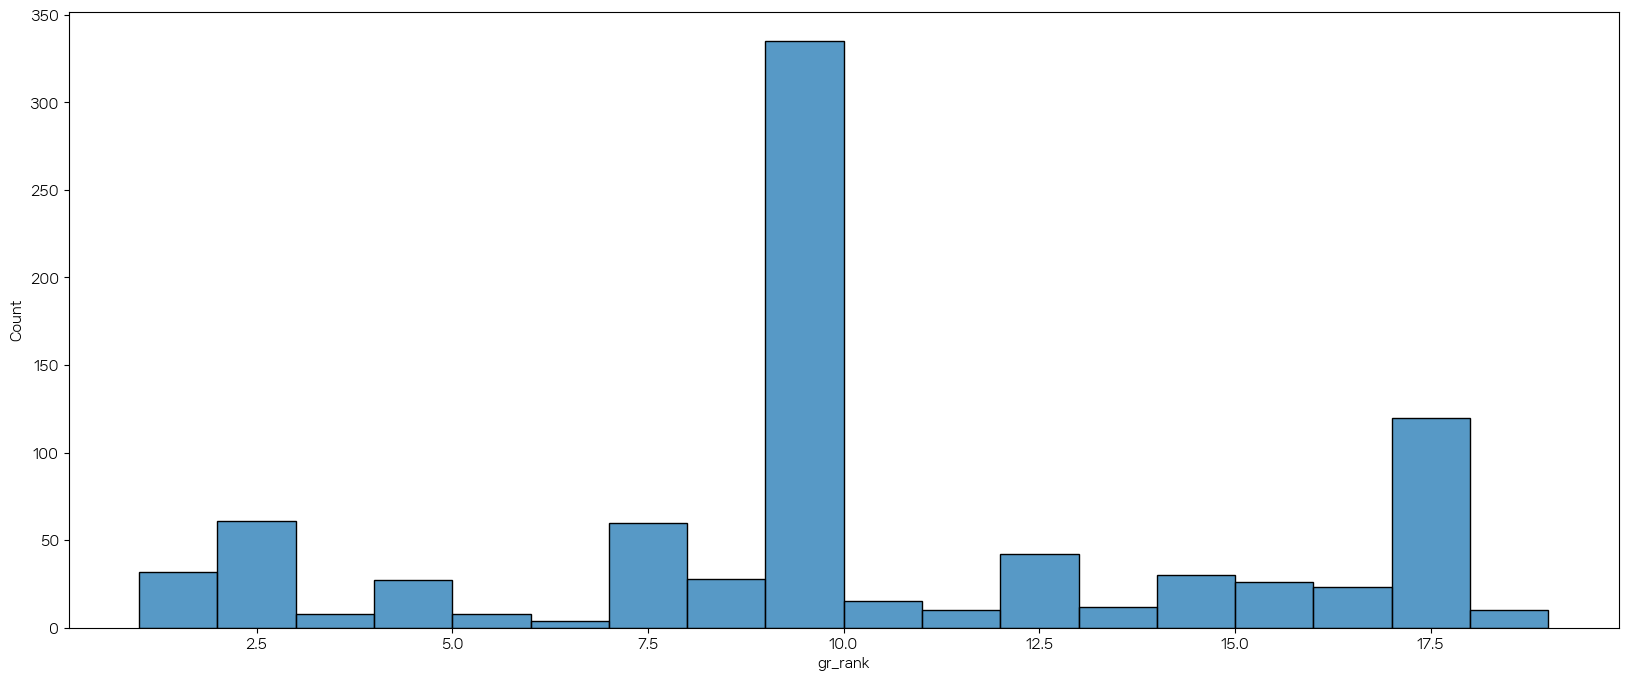

In [ ]:
# Calculating director rank based on the mean total audience
director_rank = df_movies.groupby('감독')['전국 관객수'].mean().reset_index(
    name='director_rank').sort_values(by='director_rank', ascending=False)
director_rank['director_rank'] = [i+1 for i in range(director_rank.shape[0])]
df_movies = pd.merge(df_movies, director_rank, how='left')
df_movies.drop('감독', axis=1, inplace=True)
print(director_rank)

# Calculating genre rank based on the mean total audience
genre_rank = df_movies.groupby('장르')['전국 관객수'].mean().reset_index(name='gr_rank').sort_values(by='gr_rank', ascending=False)
genre_rank['gr_rank'] = [i+1 for i in range(genre_rank.shape[0])]
df_movies = pd.merge(df_movies, genre_rank, how='left')
df_movies.drop('장르', axis=1, inplace=True)
plt.figure(figsize=[20,8])
sns.histplot(data=df_movies, x='gr_rank')
plt.show()

# Calculating distributor rank based on the mean total audience
distributor_rank = df_movies.groupby('배급사')['전국 관객수'].mean().reset_index(name='dis_rank').sort_values(by='dis_rank', ascending=False)
distributor_rank['dis_rank'] = [i+1 for i in range(distributor_rank.shape[0])]
df_movies = pd.merge(df_movies, distributor_rank, how='left')
df_movies.drop('배급사', axis=1, inplace=True)

### categorical data to numerical data

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders dictionary
label_encoders = {}

# Iterate over specified columns for label encoding
for column in ['영화구분', '등급', '제작사']:
    # Instantiate label encoder
    le = LabelEncoder()
    # Fit label encoder and transform the column
    df_movies[column] = le.fit_transform(df_movies[column])
    # Store the label encoder in the dictionary
    label_encoders[column] = le

# Data validation
print(df_movies['주연배우_흥행비율'])

# Drop rows with missing values in the '주연배우_흥행비율' column
df_movies.dropna(subset='주연배우_흥행비율', inplace=True)

# Display data information after dropping missing values
df_movies.info()

0      0.249570
1      0.319688
2      0.310839
3      0.301492
4      0.032677
         ...   
846    0.000319
847    0.000014
848    0.000059
849    0.010671
850    0.000007
Name: 주연배우_흥행비율, Length: 851, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 850
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영화명            850 non-null    object 
 1   제작사            850 non-null    int64  
 2   전국 관객수         850 non-null    int64  
 3   등급             850 non-null    int64  
 4   영화구분           850 non-null    int64  
 5   흥행             850 non-null    object 
 6   주연배우_흥행비율      850 non-null    float64
 7   director_rank  850 non-null    int64  
 8   gr_rank        850 non-null    int64  
 9   dis_rank       850 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 73.0+ KB


In [26]:
df_movies.isna().sum()

영화명              0
제작사              0
전국 관객수           0
등급               0
영화구분             0
흥행               0
주연배우_흥행비율        0
director_rank    0
gr_rank          0
dis_rank         0
dtype: int64

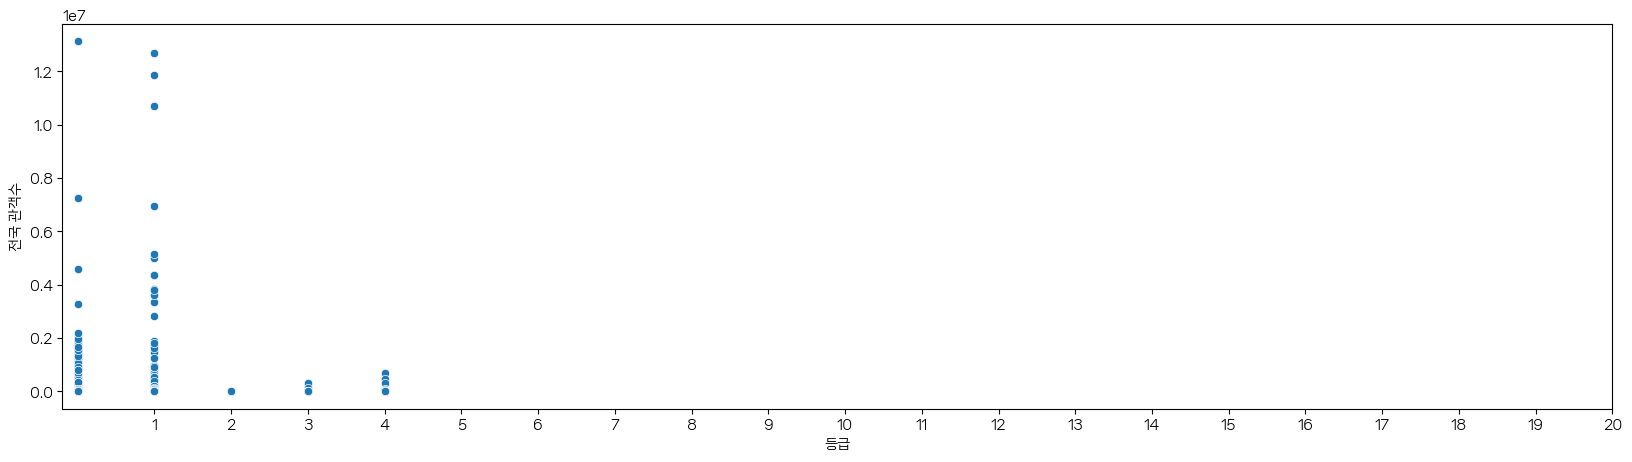

In [ ]:
plt.figure(figsize=[20,5])
sns.scatterplot(data=df_movies, x='등급', y='전국 관객수')
plt.xticks(np.arange(1,21))
plt.show()

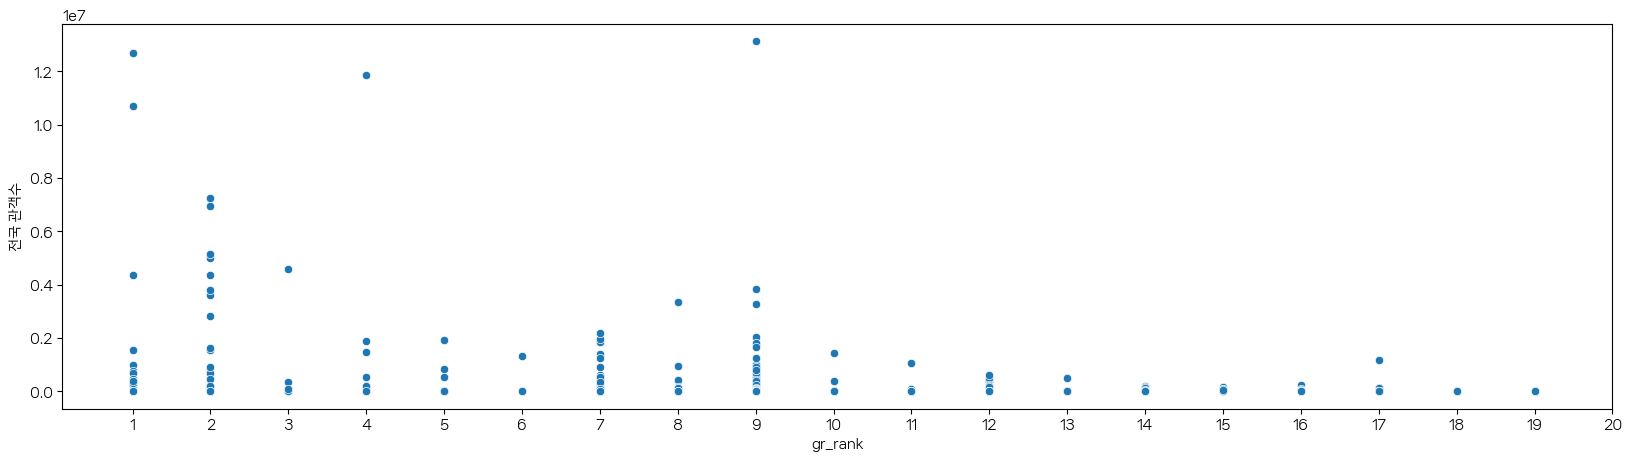

In [ ]:
plt.figure(figsize=[20,5])
sns.scatterplot(data=df_movies, x='gr_rank', y='전국 관객수')
plt.xticks(np.arange(1,21))
plt.show()

### find best feature

Top 3 features based on importance: ['director_rank', '주연배우_흥행비율', '제작사']
Features: ('director_rank', '주연배우_흥행비율'), Adjusted R^2: 0.6371045366124789, R^2: 0.6385304519892472, p-values: [3.91461969e-003 1.40083427e-102]
Best Adjusted R^2: 0.6371045366124789
Best Feature Combination: ('director_rank', '주연배우_흥행비율')


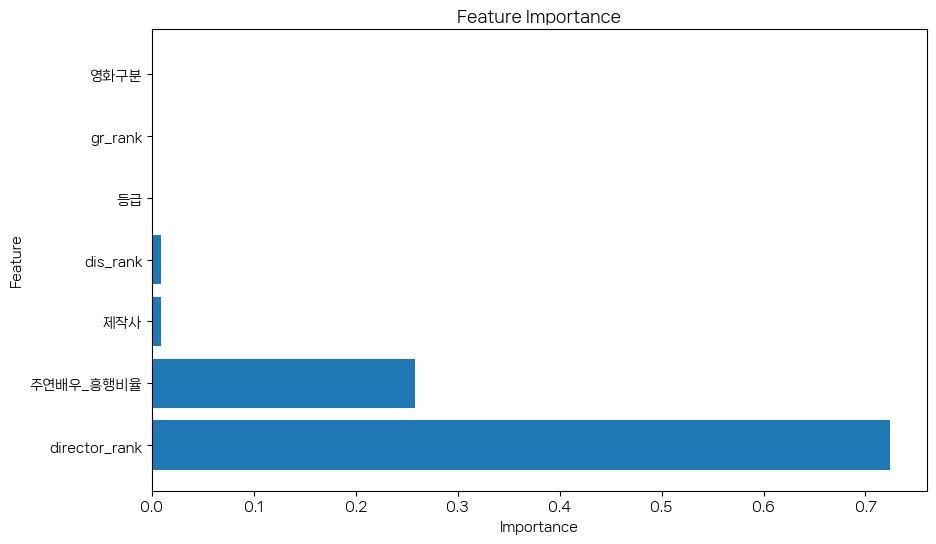

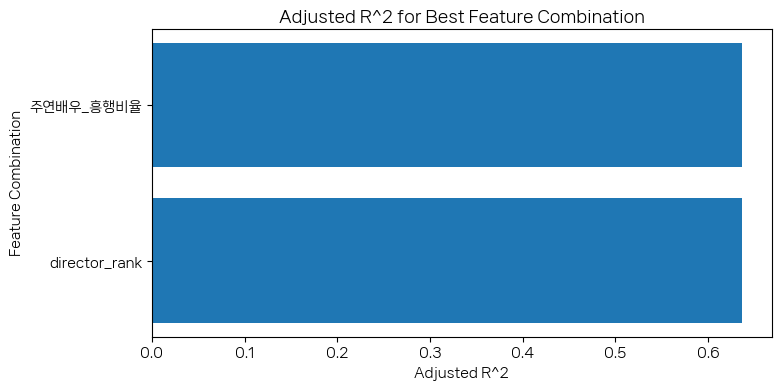

In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Selecting necessary features
features = ['영화구분', '등급', 'gr_rank', 'dis_rank', 'director_rank', '제작사', '주연배우_흥행비율']

# Separating features and target
X = df_movies[features]
y = df_movies['전국 관객수']

# Handling missing values and infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Adjusting y accordingly as X has dropped rows with missing values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Training the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Calculating feature importances
feature_importances = gb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Selecting top n features (e.g., top 3 features)
n_top_features = 3
top_features = importance_df.head(n_top_features)['Feature'].tolist()

print(f'Top {n_top_features} features based on importance: {top_features}')

# Finding the optimal feature combination
best_adj_r2 = -np.inf
best_features = None

for i in range(2, len(top_features) + 1):   # Starting from combinations with at least two features
    for combo in combinations(top_features, i):
        X_combo = X[list(combo)]
        X_train, X_test, y_train, y_test = train_test_split(X_combo, y, test_size=0.4, random_state=42)
        X_train = sm.add_constant(X_train)  # Adding a constant term
        model = sm.OLS(y_train, X_train)
        result = model.fit()
        p_values = result.pvalues[1:]  # p-values of features excluding the constant term
        r_squared = result.rsquared
        if all(p_values.values < 0.05):
            if result.rsquared_adj > best_adj_r2:
                print(f'Features: {combo}, Adjusted R^2: {result.rsquared_adj}, R^2: {r_squared}, p-values: {p_values.values}')
                best_adj_r2 = result.rsquared_adj
                best_features = combo

print(f'Best Adjusted R^2: {best_adj_r2}')
print(f'Best Feature Combination: {best_features}')

# Visualizing feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Visualizing the optimal feature combination
plt.figure(figsize=(8, 4))
plt.barh(best_features, best_adj_r2)
plt.xlabel('Adjusted R^2')
plt.ylabel('Feature Combination')
plt.title('Adjusted R^2 for Best Feature Combination')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, classification_report

# Data split with the best features
X_best = X[list(best_features)]
y = df_movies['흥행']
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# K-fold setting
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Training and K-fold cross-validation for Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_best, y, cv=kf, scoring='accuracy')
print(f'Random Forest K-fold Cross Validation Scores: {rf_cv_scores}')
print(f'Random Forest Mean CV Accuracy: {np.mean(rf_cv_scores)}')

# Calculating cross-validated predictions
rf_y_pred_cv = cross_val_predict(rf, X_best, y, cv=kf)

# Confusion matrix and classification report output
rf_conf_matrix = confusion_matrix(y, rf_y_pred_cv)
rf_class_report = classification_report(y, rf_y_pred_cv)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classification Report:\n", rf_class_report)

# Training and K-fold cross-validation for Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=42)
gb_cv_scores = cross_val_score(gb, X_best, y, cv=kf, scoring='accuracy')
print(f'Gradient Boosting K-fold Cross Validation Scores: {gb_cv_scores}')
print(f'Gradient Boosting Mean CV Accuracy: {np.mean(gb_cv_scores)}')

# Calculating cross-validated predictions
gb_y_pred_cv = cross_val_predict(gb, X_best, y, cv=kf)

# Confusion matrix and classification report output
gb_conf_matrix = confusion_matrix(y, gb_y_pred_cv)
gb_class_report = classification_report(y, gb_y_pred_cv)
print("Gradient Boosting Confusion Matrix:\n", gb_conf_matrix)
print("Gradient Boosting Classification Report:\n", gb_class_report)

Random Forest K-fold Cross Validation Scores: [0.91764706 0.91764706 0.87058824 0.83529412 0.83529412 0.77647059
 0.87058824 0.82352941 0.89411765 0.81176471]
Random Forest Mean CV Accuracy: 0.8552941176470588
Random Forest Confusion Matrix:
 [[636  62]
 [ 61  91]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           N       0.91      0.91      0.91       698
           Y       0.59      0.60      0.60       152

    accuracy                           0.86       850
   macro avg       0.75      0.75      0.75       850
weighted avg       0.86      0.86      0.86       850

Gradient Boosting K-fold Cross Validation Scores: [0.91764706 0.91764706 0.87058824 0.83529412 0.83529412 0.77647059
 0.85882353 0.83529412 0.89411765 0.8       ]
Gradient Boosting Mean CV Accuracy: 0.8541176470588235
Gradient Boosting Confusion Matrix:
 [[636  62]
 [ 62  90]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   sup

#### Bagging

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

# Data split with the best features
X_best = X[list(best_features)]
y = df_movies['흥행']
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)


# Naive Bayes classifier training and K-fold cross-validation
nb = GaussianNB()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Calculating cross-validation scores
cv_scores = cross_val_score(nb, X_best, y, cv=kf, scoring='accuracy')
print(f'K-fold Cross Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')


# Calculating cross-validated predictions
y_pred_cv = cross_val_predict(nb, X_best, y, cv=kf)

# Confusion matrix and classification report output
conf_matrix = confusion_matrix(y, y_pred_cv)
class_report = classification_report(y, y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

print("bagging")
# Creating a Bagging classifier
bagging_nb = BaggingClassifier(estimator=nb, n_estimators=10, random_state=42)

# Model training
bagging_nb.fit(X_train, y_train)

# Prediction
y_pred = bagging_nb.predict(X_test)

# Full prediction
y_pred_full = bagging_nb.predict(X_best)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

# Prediction results and actual values output
#comparison_df = pd.DataFrame({ 'Actual Values': y_test.values, 'Predicted Results': y_pred})

# Full prediction results and actual values output
comparison_df_full = pd.DataFrame({'Actual Values': y.values, 'Predicted Results': y_pred_full})
comparison_df_full = pd.concat([comparison_df_full,df_movies['영화명']], axis=1)
comparison_df_full.to_csv("prediction_bagging.csv")
# Successful and failed predictions counts
print(comparison_df_full['Actual Values'].value_counts())
print(comparison_df_full['Predicted Results'].value_counts())


# Calculating confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculating accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculating sensitivity
sensitivity = tp / (tp + fn)

# Calculating specificity
specificity = tn / (tn + fp)

# Output results
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

K-fold Cross Validation Scores: [0.95294118 0.94117647 0.88235294 0.85882353 0.89411765 0.85882353
 0.89411765 0.87058824 0.91764706 0.89411765]
Mean CV Accuracy: 0.8964705882352941
Confusion Matrix:
 [[668  30]
 [ 58  94]]
Classification Report:
               precision    recall  f1-score   support

           N       0.92      0.96      0.94       698
           Y       0.76      0.62      0.68       152

    accuracy                           0.90       850
   macro avg       0.84      0.79      0.81       850
weighted avg       0.89      0.90      0.89       850

bagging
Confusion Matrix:
 [[145   5]
 [  4  16]]

Classification Report:
               precision    recall  f1-score   support

           N       0.97      0.97      0.97       150
           Y       0.76      0.80      0.78        20

    accuracy                           0.95       170
   macro avg       0.87      0.88      0.88       170
weighted avg       0.95      0.95      0.95       170

Actual Values
N    698


#### Adaboost

In [31]:
# Naive Bayes classifier creation
nb = GaussianNB()
print("adaboost")
# Boosting classifier creation
adaboost_nb = AdaBoostClassifier(estimator=nb, n_estimators=10, random_state=42)

# Model training
adaboost_nb.fit(X_train, y_train)

# Prediction
y_pred = adaboost_nb.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
# Calculating confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculating accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculating sensitivity
sensitivity = tp / (tp + fn)

# Calculating specificity
specificity = tn / (tn + fp)

# Output results
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Full prediction
y_pred_full = adaboost_nb.predict(X_best)
# Full prediction results and actual values output
comparison_df_full = pd.DataFrame({'Actual Values': y.values, 'Predicted Results': y_pred_full})
comparison_df_full = pd.concat([comparison_df_full,df_movies['영화명']], axis=1)
comparison_df_full.to_csv("prediction_adaboost.csv")
# Successful and failed predictions counts
print(comparison_df_full['Actual Values'].value_counts())
print(comparison_df_full['Predicted Results'].value_counts())

adaboost
Confusion Matrix:
 [[149   1]
 [ 12   8]]

Classification Report:
               precision    recall  f1-score   support

           N       0.93      0.99      0.96       150
           Y       0.89      0.40      0.55        20

    accuracy                           0.92       170
   macro avg       0.91      0.70      0.75       170
weighted avg       0.92      0.92      0.91       170

Accuracy: 0.9235294117647059
Sensitivity: 0.4
Specificity: 0.9933333333333333
Actual Values
N    698
Y    152
Name: count, dtype: int64
Predicted Results
N    783
Y     67
Name: count, dtype: int64
